<a href="https://colab.research.google.com/github/ParishaKB/SM/blob/master/mnist_pca_nn_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from PIL import Image
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import zipfile
with zipfile.ZipFile("/content/gdrive/My Drive/mnist_train.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/gdrive/My Drive/forest_cover")
with zipfile.ZipFile("/content/gdrive/My Drive/mnist_test.csv.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/gdrive/My Drive/forest_cover")

In [ ]:
import pandas as pd
traindata = pd.read_csv("/content/gdrive/My Drive/forest_cover/mnist_train.csv")
testdata = pd.read_csv("/content/gdrive/My Drive/forest_cover/mnist_test.csv")

In [ ]:
ytrain = traindata['label']
ytest = testdata['label']

In [ ]:
traindata.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
testdata.iloc[:,1:785].head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

xtrain = traindata.iloc[:,1:785]

xtest = testdata.iloc[:,1:785]

In [ ]:
ytrain = traindata['label']
ytest = testdata['label']

In [ ]:
ytrain.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
k = xtrain.iloc[0,:]
k.shape

(784,)

In [ ]:
xtrain.iloc[0,:]

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 0, Length: 784, dtype: int64

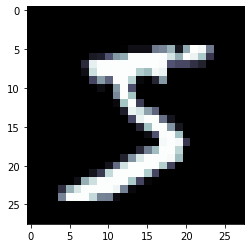

In [ ]:
from matplotlib import pyplot as plt
x0 = xtrain.iloc[0,:]
x0.shape
x0 = np.array(x0).reshape(28,28)
x0.shape
plt.imshow(x0,cmap=plt.cm.bone)

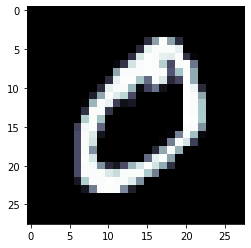

In [ ]:
from matplotlib import pyplot as plt
x1 = xtrain.iloc[1,:]
x1 = np.array(x1).reshape(28,28)
plt.imshow(x1,cmap=plt.cm.bone)

In [ ]:
print(xtrain.shape,xtest.shape)
print(ytrain.shape,ytest.shape)

(60000, 784) (10000, 784)
(60000,) (10000,)


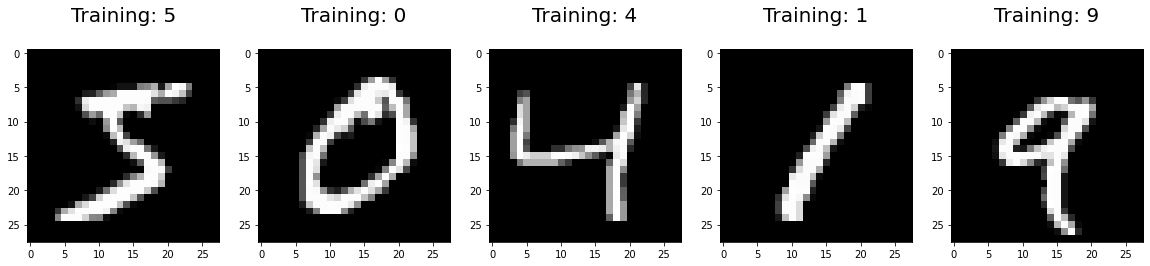

In [ ]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow((np.array(xtrain.iloc[i,:])).reshape(28,28), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % ytrain.iloc[i], fontsize = 20)

In [ ]:
ytrain.dtypes

dtype('int64')

LOG REG

In [ ]:
y_train= pd.DataFrame (ytrain)
y_test = pd.DataFrame(ytest)
y_train_cat = y_train.astype('category')
y_test_cat = y_test.astype('category')
y_train_dumm = pd.get_dummies (y_train_cat)
y_test_dumm  = pd.get_dummies(y_test_cat)

In [ ]:
ytrain.shape

(60000,)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(xtrain, ytrain)

predictions = logisticRegr.predict(xtest)

score = logisticRegr.score(xtest, ytest)
print(score)

0.9255


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LDA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
lda.fit (xtrain,ytrain)
pred = lda.predict(xtest)
pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import accuracy_score
acculda = accuracy_score(pred, ytest)
acculda

0.873

Neural Network

In [ ]:
from keras import models
from keras import layers

In [ ]:
nn=models.Sequential()

In [ ]:
nn.add(layers.Dense(1024,activation = "relu",input_shape=(784,))) 
nn.add(layers.Dense(512,activation='relu'))
nn.add(layers.Dense(512,activation='tanh'))
nn.add(layers.Dense(256,activation='relu'))
nn.add(layers.Dense(128,activation='relu'))
nn.add(layers.Dense(10,activation='softmax'))

In [ ]:
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              803840    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 1,756,810
Trainable params: 1,756,810
Non-trainable params: 0
______________________________________________

In [ ]:
nn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
nn.fit(xtrain,y_train_dumm,epochs=10,batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 18s 3ms/step - loss: 1.3525 - accuracy: 0.4960
Epoch 2/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.7415 - accuracy: 0.7757
Epoch 3/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.5982 - accuracy: 0.8336
Epoch 4/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.5726 - accuracy: 0.8540
Epoch 5/10
6000/6000 [==============================] - 18s 3ms/step - loss: 0.5368 - accuracy: 0.8779
Epoch 6/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.5382 - accuracy: 0.8820
Epoch 7/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.5879 - accuracy: 0.8764
Epoch 8/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.6738 - accuracy: 0.8563
Epoch 9/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.6927 - accuracy: 0.8523
Epoch 10/10
6000/6000 [==============================] - 17s 3ms/step - l

In [ ]:
test_loss,test_accuracy = nn.evaluate(xtrain,y_train_dumm)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.8228 - accuracy: 0.7866


In [ ]:
test_loss,test_accuracy = nn.evaluate(xtest,y_test_dumm)
test_accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.8612 - accuracy: 0.7924


0.7924000024795532

PCA

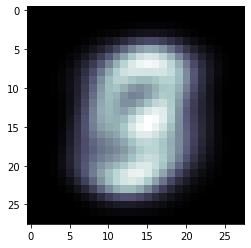

In [ ]:
from sklearn.decomposition import PCA
pca1 = PCA(200)
pca1.fit(xtrain)
plt.imshow(pca1.mean_.reshape(28,28),cmap=plt.cm.bone)

In [ ]:
print(pca1.components_.shape)

(200, 784)


In [ ]:
pca1.components_

array([[ 8.27389620e-18, -7.20884724e-18, -5.67219927e-19, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.85655280e-17, -5.24948622e-17, -3.00161684e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.11844436e-17,  2.86379914e-17,  7.54967850e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-4.12342883e-17,  1.94421622e-17,  4.99039938e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 3.64576060e-17, -4.16662397e-17,  8.54677533e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.57448879e-17,  2.10529130e-17,  3.70109158e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
eigen_values = pca1.explained_variance_
print(pca1.explained_variance_)

[332724.66744657 243283.9390705  211507.36705827 184776.38586219
 166926.83131066 147844.96167532 112178.20271178  98874.42962709
  94696.24905304  80809.82453195  72313.62025957  69358.30132665
  58826.87114946  58014.08401671  54123.75694878  50843.06852706
  45412.60630628  43778.45913157  40705.3404534   39519.79037989
  36553.53586136  34515.1938788   32693.28606333  31286.58581655
  30287.55259946  28776.07835035  27859.28540477  26960.58144171
  25533.19358798  23686.12297984  22562.76193847  22221.76640968
  20660.67182484  20110.98541391  19543.20092441  18638.29211806
  17340.90030814  16726.24478574  16505.81737445  16191.66315672
  15659.57994255  15251.214116    14348.32884502  13652.82313996
  13198.8643249   12860.42927921  12411.48279967  12054.31597729
  11658.90431685  11035.47438935  10937.50779448  10724.52539014
  10147.77338211   9906.81588342   9741.41800878   9306.18377899
   9240.54996351   8861.73785703   8700.53133618   8392.32148556
   8245.7589279    8203.1

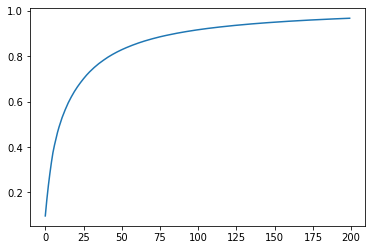

In [ ]:
import numpy as np
plt.plot(np.cumsum(pca1.explained_variance_ratio_))

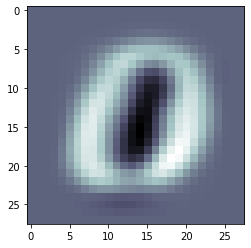

In [ ]:
plt.imshow(pca1.components_[0].reshape(28,28),cmap=plt.cm.bone)

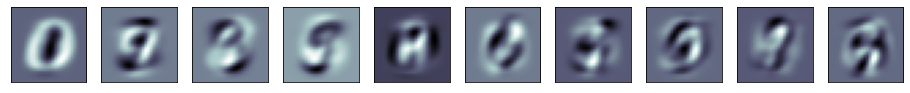

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(10):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca1.components_[i].reshape(28,28),
              cmap=plt.cm.bone)
#eigen face

In [ ]:
projectedtrain = pca1.fit_transform(xtrain)  ##omega
print(projectedtrain.shape)

(60000, 200)


In [ ]:
projectedtest = pca1.transform(xtest)  ##omega
print(projectedtest.shape)

(10000, 200)


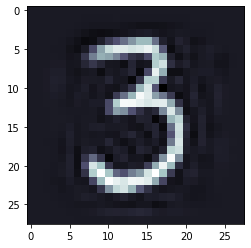

In [ ]:
#projected digit
inv_proj3 = pca1.inverse_transform(projectedtrain)
plt.imshow(inv_proj3[50].reshape(28,28),cmap=plt.cm.bone)

LR PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

logisticRegr.fit(projectedtrain, ytrain)

predictions = logisticRegr.predict(projectedtest)

score = logisticRegr.score(projectedtest, ytest)
print(score)

0.9223


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LDA PCA

In [ ]:
lda.fit (projectedtrain,ytrain)
pred = lda.predict(projectedtest)
pred

array([7, 2, 1, ..., 4, 8, 6])

In [ ]:
from sklearn.metrics import accuracy_score
acculda = accuracy_score(pred, ytest)
acculda

0.8744

NN PCA

In [ ]:
from keras import models
from keras import layers

In [ ]:
model=models.Sequential()

In [ ]:
model.add(layers.Dense(1024,activation = "relu",input_shape=(200,))) 
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(512,activation='tanh'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1024)              205824    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 1,158,794
Trainable params: 1,158,794
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(projectedtrain,y_train_dumm,epochs=10,batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.6614 - accuracy: 0.7943
Epoch 2/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.5201 - accuracy: 0.8679
Epoch 3/10
6000/6000 [==============================] - 17s 3ms/step - loss: 0.5455 - accuracy: 0.8753
Epoch 4/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.6504 - accuracy: 0.8565
Epoch 5/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.7725 - accuracy: 0.8303
Epoch 6/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.8099 - accuracy: 0.8264
Epoch 7/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.9245 - accuracy: 0.7883
Epoch 8/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.8365 - accuracy: 0.8154
Epoch 9/10
6000/6000 [==============================] - 16s 3ms/step - loss: 0.8479 - accuracy: 0.8167
Epoch 10/10
6000/6000 [==============================] - 16s 3ms/step - l